In [153]:
#Load the Dataset
import pandas as pd
data = pd.read_csv("ElectricCarData_Norm.csv")
print(data.shape)
data.head()

(103, 14)


,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


## Dataset Features
The dataset contains the following features:
### Numerical Features:
1. Acceleration
2. TopSpeed
3. Range
4. Efficiency
5. Fast Charge
6. Seats
7. Price
### Multiclass Features:
1. Brand
2. BodyStyle
3. Segment
4. PowerTrain
5. PlugType
6. Model Name(Cardinality:High)
### BinaryClass Features:
1. RapidCharge


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [155]:
print(data['RapidCharge'].value_counts())
print(data['PlugType'].value_counts())

RapidCharge
Rapid charging possible        98
Rapid charging not possible     5
Name: count, dtype: int64
PlugType
Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: count, dtype: int64


In [156]:
print(data['Brand'].value_counts())

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64


In [157]:
print(data['Seats'].value_counts())

Seats
5    71
4    21
7     6
6     3
2     2
Name: count, dtype: int64


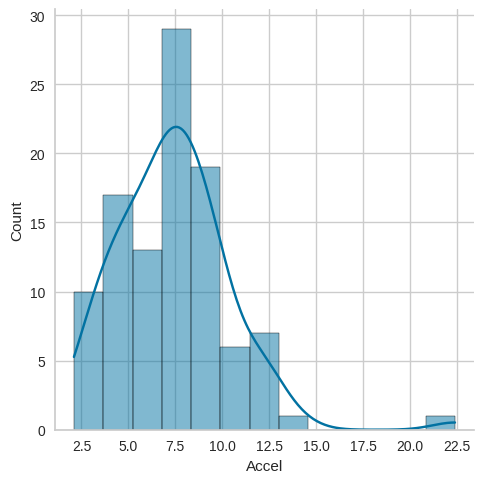

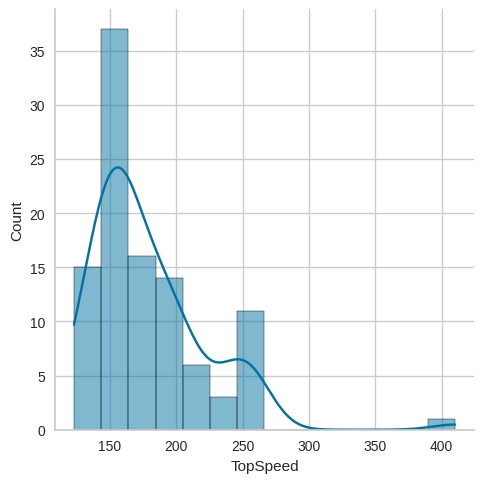

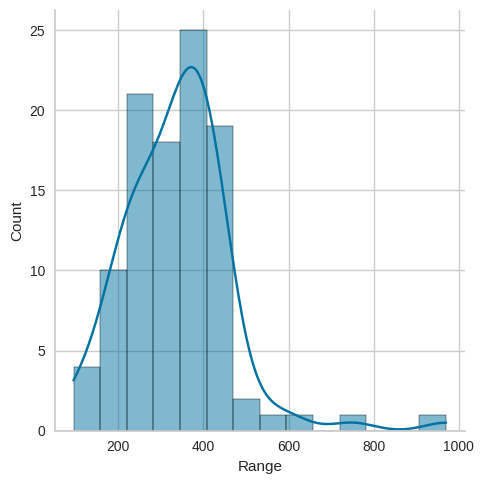

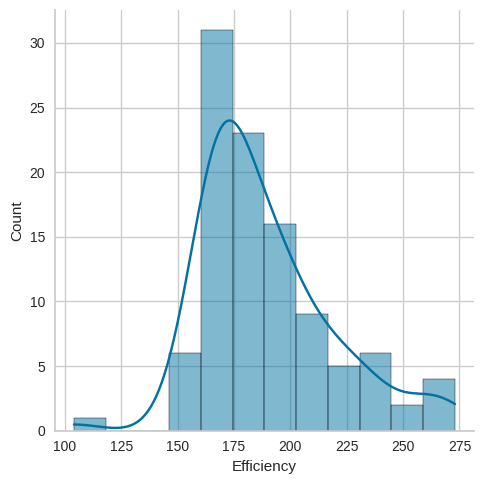

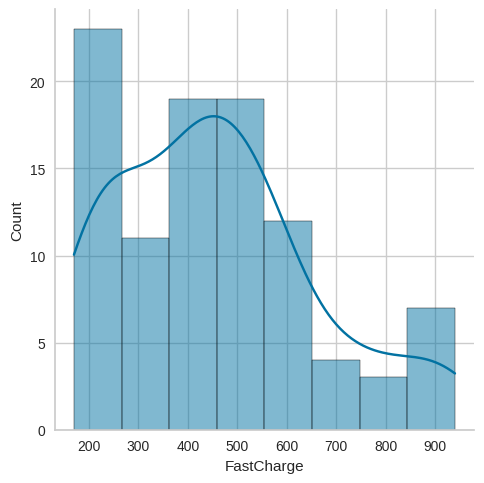

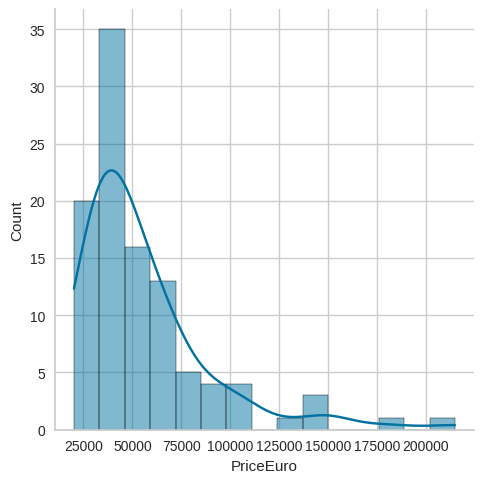

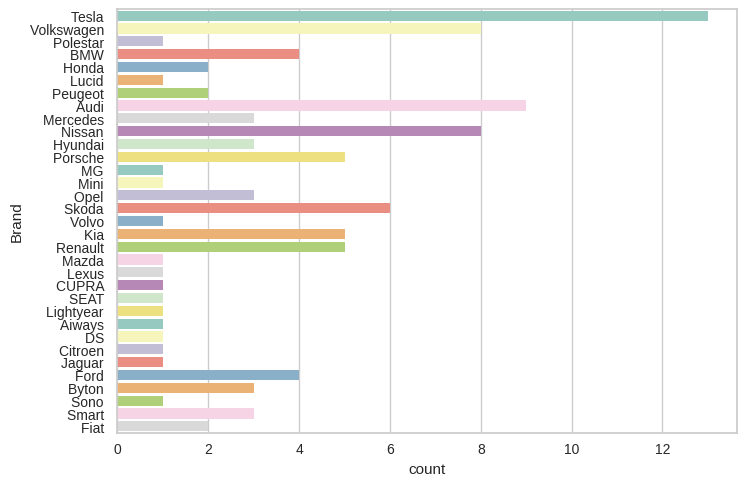

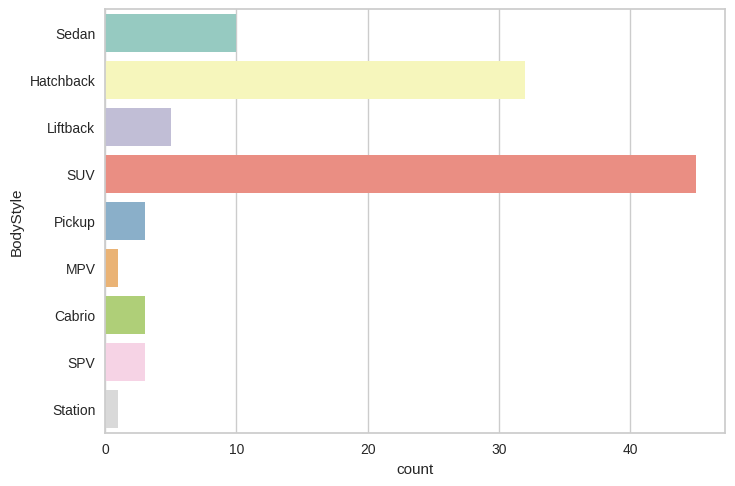

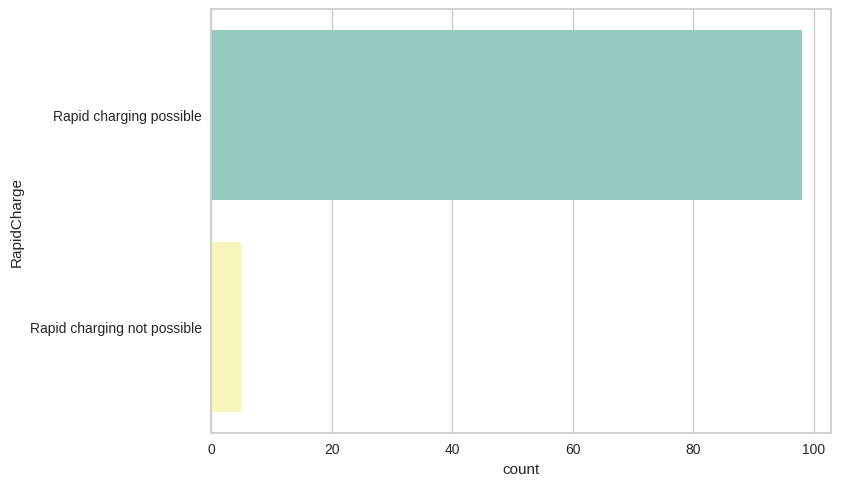

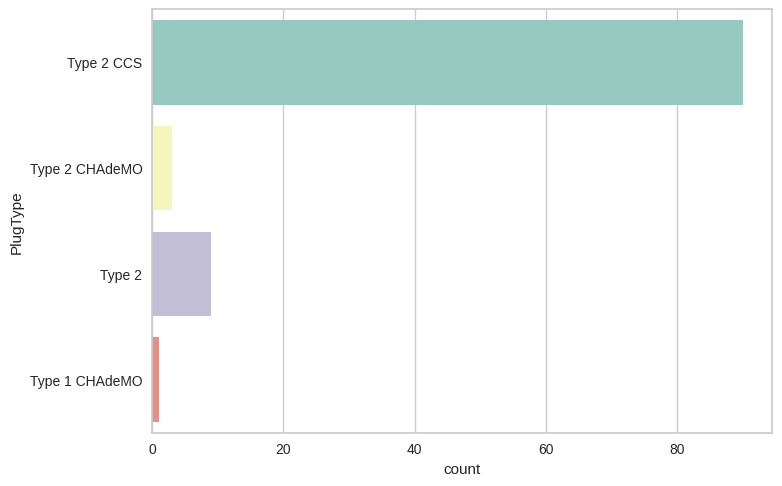

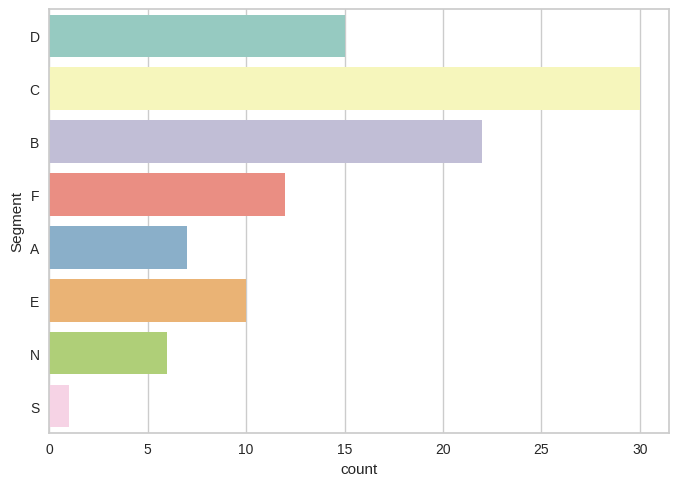

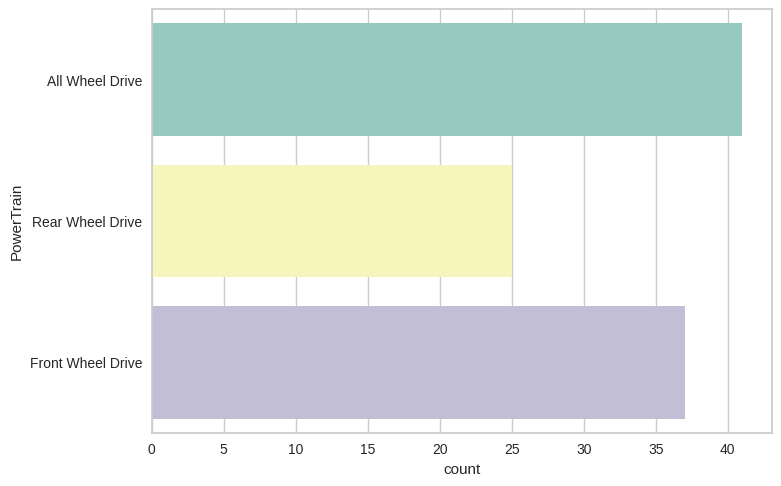

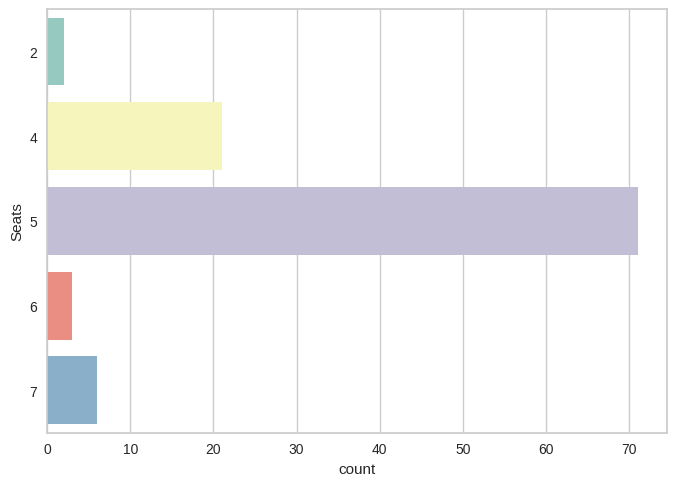

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(data):
    con = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro']

    def remove_units(value_with_units):
        if value_with_units == '-':
            return None
        numerical_value = value_with_units.split()[0]
        return numerical_value

    sns.set_palette("bright")  # Setting a colorful palette

    for i in con:
        if i == 'PriceEuro':
            sns.displot(data[i], color='b',kde = True)  # PriceEuro plot in blue
            plt.show()
        else:
            data[i] = data[i].apply(remove_units)
            data[i] = data[i].astype('float')
            sns.displot(data[i],kde = True,color='b')
            plt.show()

    cat = ['Brand', 'BodyStyle', 'RapidCharge', 'PlugType', 'Segment', 'PowerTrain', 'Model', 'Seats']

    for i in cat:
        if i != 'Model':
            if i == 'Seats':
                data[i] = data[i].astype('category')
                sns.countplot(data[i], palette='Set3')  # Set3 palette for countplot
                plt.show()
            else:
                sns.countplot(data[i], palette='Set3')  # Set3 palette for countplot
                plt.show()

# Example usage:
# Assuming 'data' is your DataFrame
visualize_data(data)


In [159]:
df = data.drop(['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro'], axis=1)

In [160]:
cat = ['Brand', 'BodyStyle', 'RapidCharge', 'PlugType', 'Segment', 'PowerTrain', 'Model', 'Seats']

# Convert columns to categorical type
for i in cat:
    df[i] = df[i].astype('category')
    print(f"df type of {i}: {df[i].dtype}")

    # Check if column is successfully converted to category
    if df[i].dtype.name == 'category':
        df[i] = df[i].cat.codes
    else:
        print(f"Column {i} is not converted to categorical type")
for i in cat:
    print(df[i].value_counts())


df type of Brand: category
df type of BodyStyle: category
df type of RapidCharge: category
df type of PlugType: category
df type of Segment: category
df type of PowerTrain: category
df type of Model: category
df type of Seats: category
Brand
30    13
1      9
20     8
31     8
27     6
25     5
24     5
12     5
2      4
8      4
28     3
3      3
18     3
10     3
21     3
7      2
22     2
9      2
19     1
6      1
23     1
29     1
15     1
11     1
5      1
0      1
16     1
14     1
26     1
4      1
13     1
17     1
32     1
Name: count, dtype: int64
BodyStyle
6    45
1    32
7    10
2     5
4     3
0     3
5     3
3     1
8     1
Name: count, dtype: int64
RapidCharge
1    98
0     5
Name: count, dtype: int64
PlugType
2    90
1     9
3     3
0     1
Name: count, dtype: int64
Segment
2    30
1    22
3    15
5    12
4    10
0     7
6     6
7     1
Name: count, dtype: int64
PowerTrain
0    41
1    37
2    25
Name: count, dtype: int64
Model
88    2
46    1
57    1
64    1
43    1
 

In [161]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(df)
pca = PCA(n_components=8)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.002819,0.797280,-0.448434,-0.453948,-0.098310,-1.296068,-0.477947,-0.186006
1,1.565827,0.294619,-1.270358,1.041861,0.366033,-0.071670,0.654921,-0.033222
2,0.095416,1.021502,-1.553909,-1.129012,-0.013658,0.650951,-0.167001,-0.006078
3,-0.651776,-1.708580,1.516328,1.340124,-0.276646,0.147882,0.767469,0.102592
4,1.601860,-1.968781,0.449982,0.460793,0.656581,0.489579,0.434429,-0.294756


In [162]:
pca.explained_variance_ratio_

array([0.30369115, 0.21084608, 0.15999086, 0.09760005, 0.0758904 ,
       0.06355694, 0.05405662, 0.03436791])

In [163]:
loadings = pca.components_

# Get the number of principal components
num_pc = pca.n_components_

# Assuming 'df' is your original DataFrame
pc_list = ["pc"+str(i) for i in range(1, num_pc+1)]

# Create DataFrame from loadings
loadings_df = pd.DataFrame(loadings, columns=pc_list)

# Add feature names as index
loadings_df.index = df.columns

loadings_df


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
Brand,0.207942,-0.197111,-0.405590,0.426773,-0.148082,-0.465526,-0.438191,-0.374988
Model,0.501902,-0.357023,-0.276839,-0.197284,-0.518054,-0.001414,0.352533,0.335271
RapidCharge,-0.352363,0.529360,-0.460446,0.055733,-0.511926,0.258268,0.132162,-0.185105
PowerTrain,0.148915,0.312193,0.206815,0.639121,-0.139412,0.044771,-0.166640,0.616363
PlugType,0.319278,0.581440,0.271538,-0.255273,-0.102141,-0.602426,0.175693,-0.129900
BodyStyle,-0.674879,-0.264978,0.111578,-0.031344,-0.271512,-0.542752,0.082954,0.292768
Segment,-0.014337,-0.105929,0.044736,0.540731,0.178519,-0.068273,0.766041,-0.266145
Seats,-0.030222,0.191018,-0.644896,-0.093945,0.558720,-0.228952,0.117920,0.399237


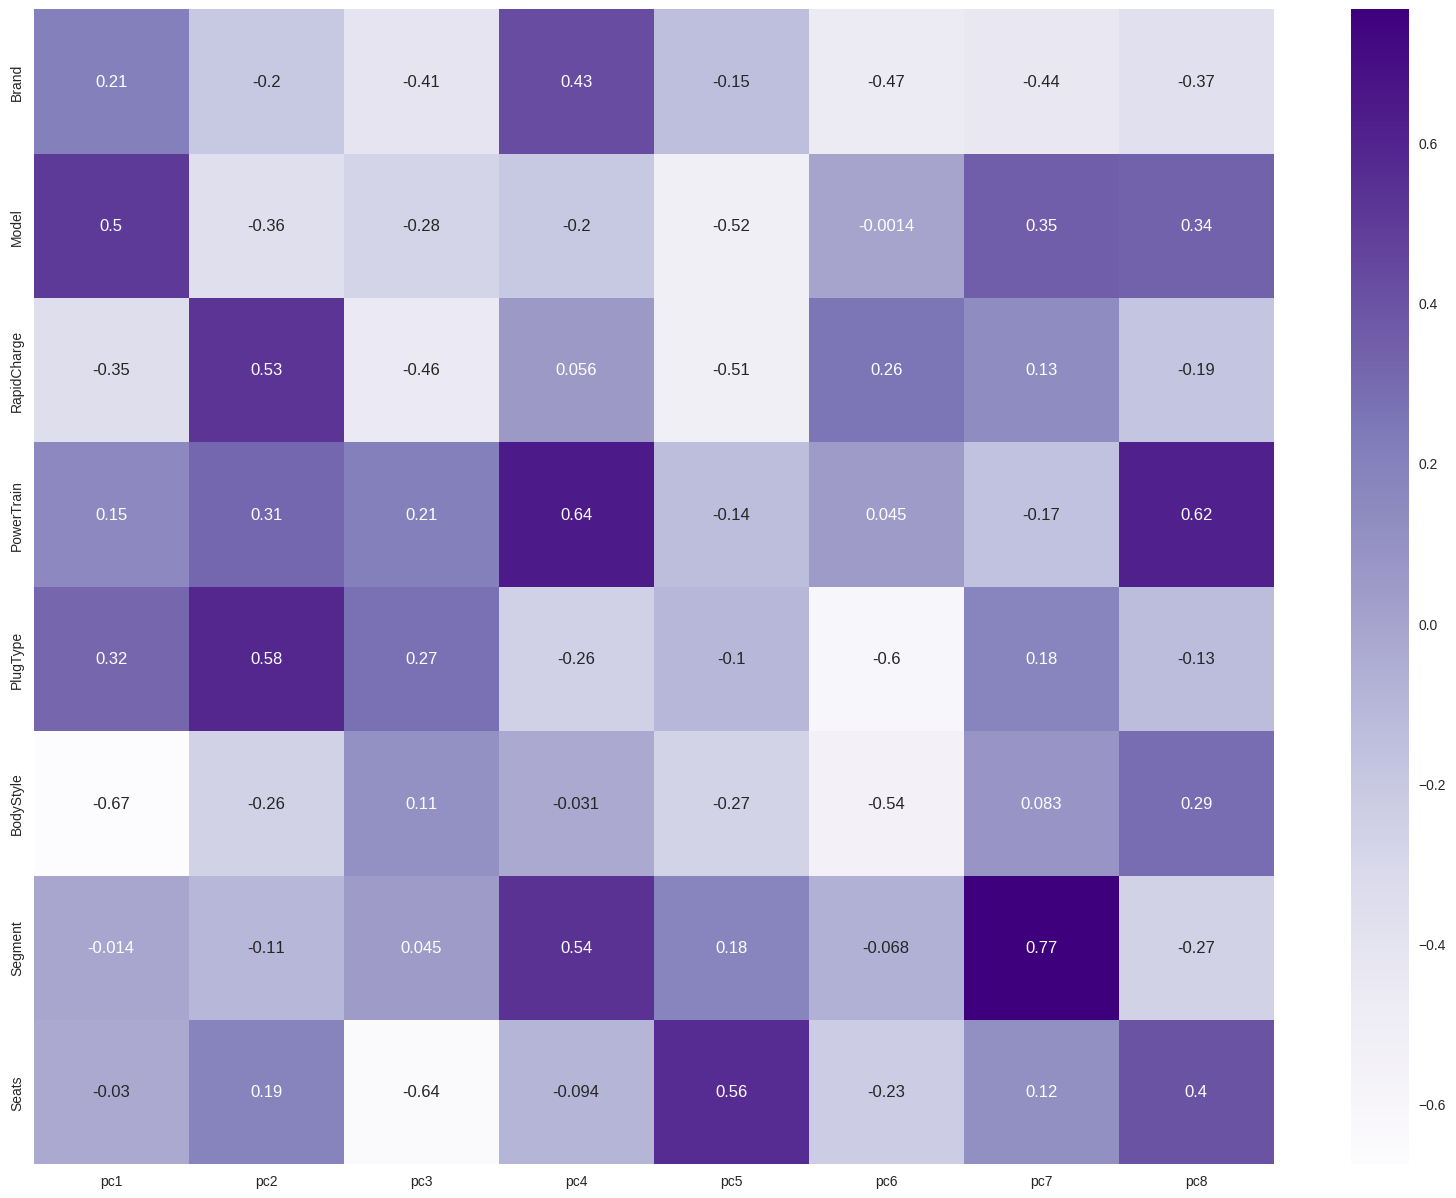

In [164]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()

In [165]:
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


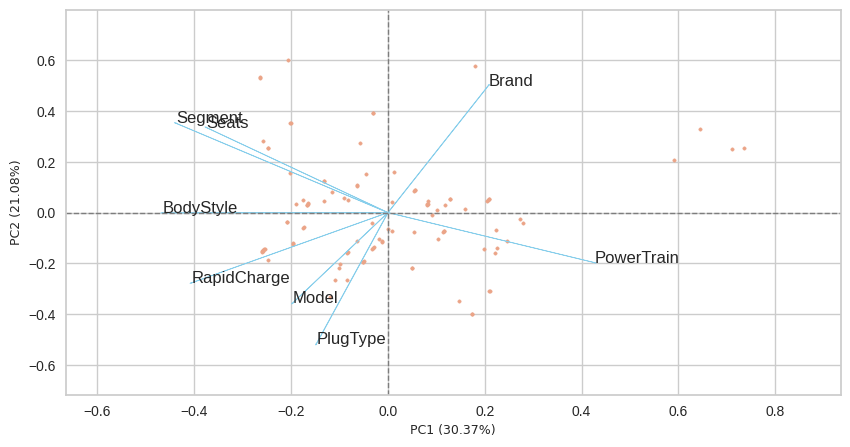

In [166]:

from bioinfokit.visuz import cluster
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

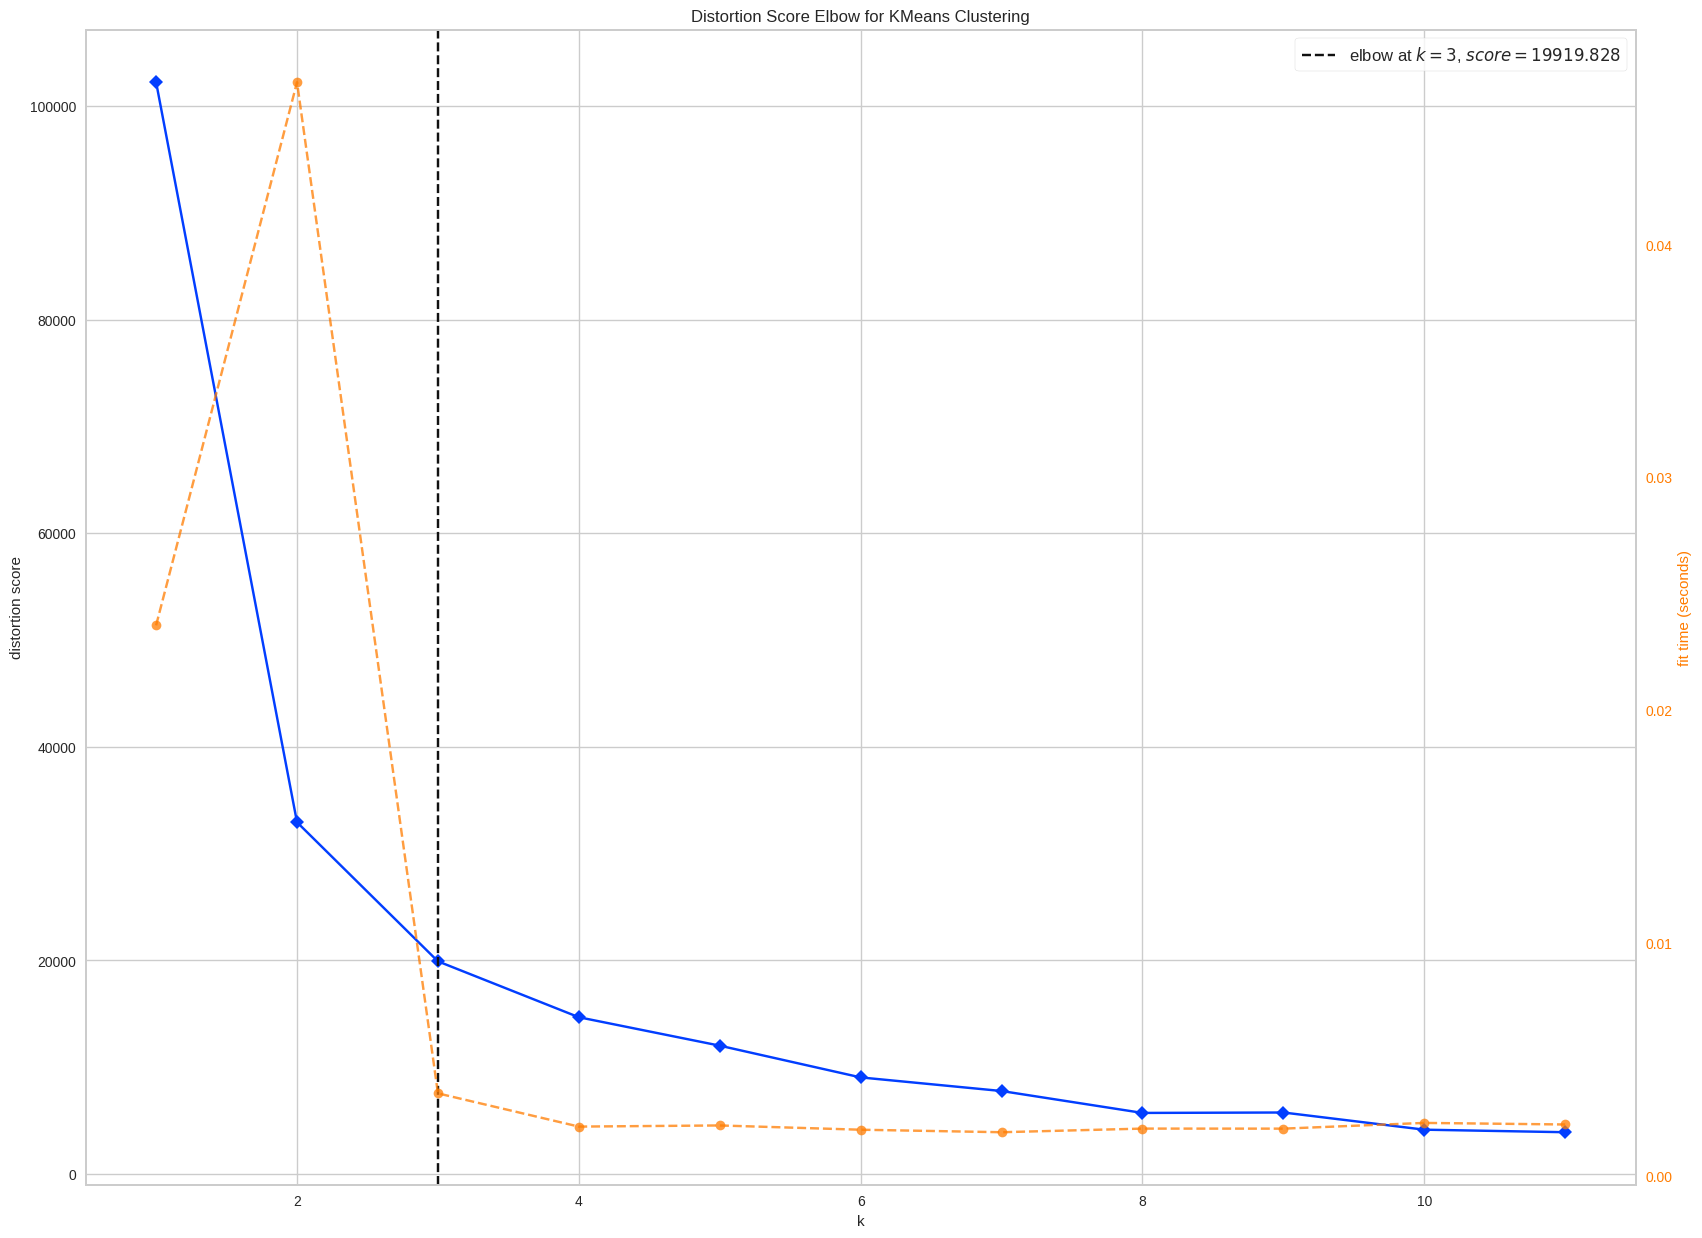

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
# using k-means clustering analysis for extracting segments
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [168]:
from collections import Counter
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [2 3 0 1 1 0 1 1 2 2 3 3 3 1 3 3 2 1 1 0 0 2 3 1 2 3 3 2 1 1 1 1 1 3 2 3 1
 1 1 3 2 3 1 0 2 1 0 2 2 1 1 2 2 3 2 1 0 2 1 2 1 2 0 3 2 2 1 3 3 2 1 3 2 2
 2 1 2 3 2 2 3 2 3 2 3 0 3 1 3 3 1 3 1 0 0 3 1 2 0 1 0 0 2]
WCSS: 16114.88129373613
No. of iterations:  9
Cluster centroids:  [[17.57142857  6.5         1.          0.64285714  2.          1.92857143
   1.71428571  1.71428571]
 [10.70967742 86.48387097  1.          1.          1.96774194  4.25806452
   2.19354839  1.83870968]
 [20.22580645 56.06451613  0.96774194  0.4516129   1.83870968  5.22580645
   3.51612903  2.        ]
 [24.25925926 27.          0.85185185  1.22222222  1.92592593  3.66666667
   2.55555556  1.96296296]]
Cluster size:  Counter({2: 31, 1: 31, 3: 27, 0: 14})


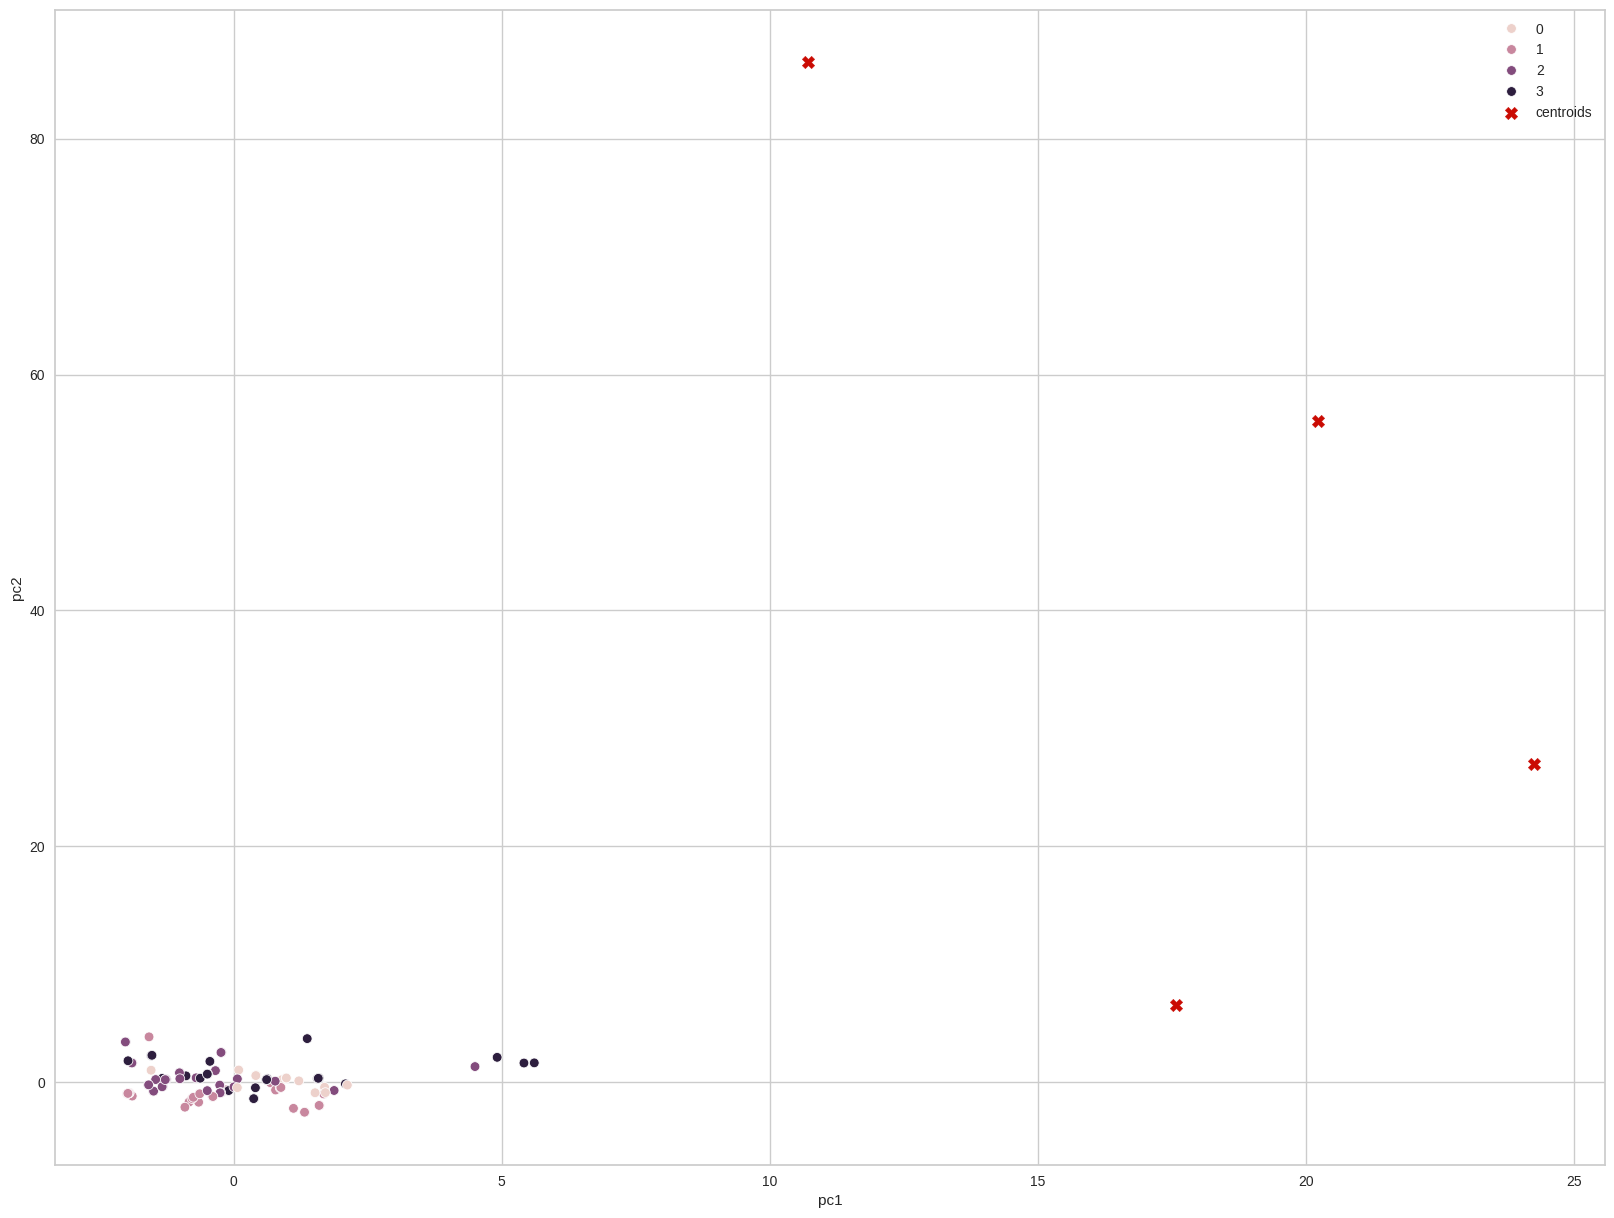

In [169]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()